In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


Zaimportowano jakieś biblioteki, następnie idziemy dalej. Print podstawowych informacji o pliku.

In [2]:
file_path = '../../data/dataset_combined.csv'  # dwa poziomy wyżej, potem do data
data = pd.read_csv(file_path, low_memory=False)
print(data.info())
print(data.shape)
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176144 entries, 0 to 176143
Data columns (total 21 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   recommendationid             176144 non-null  int64  
 1   author                       176144 non-null  object 
 2   language                     176144 non-null  object 
 3   review                       175950 non-null  object 
 4   timestamp_created            176144 non-null  int64  
 5   timestamp_updated            176144 non-null  int64  
 6   voted_up                     176144 non-null  bool   
 7   votes_up                     176144 non-null  int64  
 8   votes_funny                  176144 non-null  int64  
 9   weighted_vote_score          176144 non-null  float64
 10  comment_count                176144 non-null  int64  
 11  steam_purchase               176144 non-null  bool   
 12  received_for_free            176144 non-null  bool   
 13 

PLik ma 27 kolumn, 300 wierszy. Mamy 5 boolean, 3 float, 15 integer, 4 object. ### Opis kolumn w zbiorze danych

| **Nazwa kolumny**                | **Typ**   | **Opis**                                                                  |
|----------------------------------|-----------|---------------------------------------------------------------------------|
| `recommendationid`               | `int64`   | Unikalne ID recenzji.                                                     |
| `language`                       | `object`  | Język, w którym napisana została recenzja.                                |
| `review`                         | `object`  | Tekst recenzji gry.                                                       |
| `timestamp_created`              | `int64`   | Czas utworzenia recenzji (znacznik czasowy UNIX).                         |
| `timestamp_updated`              | `int64`   | Czas ostatniej aktualizacji recenzji (znacznik czasowy UNIX).             |
| `voted_up`                       | `bool`    | Oznaczenie, czy recenzja jest pozytywna (`True`) czy negatywna (`False`). |
| `votes_up`                       | `int64`   | Liczba użytkowników, którzy uznali recenzję za przydatną.                 |
| `votes_funny`                    | `int64`   | Liczba użytkowników, którzy uznali recenzję za zabawną.                   |
| `weighted_vote_score`            | `float64` | Wynik ważony głosów na przydatność recenzji.                              |
| `comment_count`                  | `int64`   | Liczba komentarzy pod recenzją.                                           |
| `steam_purchase`                 | `bool`    | Czy użytkownik kupił grę na Steam (`True` / `False`).                     |
| `received_for_free`              | `bool`    | Czy gra została otrzymana za darmo (`True` / `False`).                    |
| `written_during_early_access`    | `bool`    | Czy recenzja powstała podczas fazy wczesnego dostępu do gry.              |
| `primarily_steam_deck`           | `bool`    | Czy gra była grana głównie na Steam Decku podczas pisania recenzji.       |
| `author_steamid`                 | `int64`   | Unikalne ID użytkownika Steam.                                            |
| `author_num_games_owned`         | `int64`   | Liczba gier posiadanych przez użytkownika.                                |
| `author_num_reviews`             | `int64`   | Liczba recenzji napisanych przez użytkownika.                             |
| `author_playtime_forever`        | `int64`   | Całkowity czas gry użytkownika w minutach.                                |
| `author_playtime_last_two_weeks` | `int64`   | Czas gry użytkownika w ciągu ostatnich dwóch tygodni (w minutach).        |
| `author_playtime_at_review`      | `int64`   | Czas gry użytkownika do momentu napisania recenzji (w minutach).          |
| `author_last_played`             | `int64`   | Czas ostatniego grania przez użytkownika (znacznik czasowy UNIX).         |
| `author_deck_playtime_at_review` | `float64` | Czas gry na Steam Decku w momencie pisania recenzji (nieliczne dane).     |
| `appid`                          | `int64`   | Identyfikator gry na platformie Steam.                                    |
| `fetch_date`                     | `object`  | Data pobrania danych w formacie `YYYYMMDD_HHMMSS`.                        |
| `total_reviews`                  | `int64`   | Łączna liczba recenzji gry.                                               |
| `timestamp_dev_responded`        | `float64` | Czas odpowiedzi dewelopera na recenzję (znacznik czasowy UNIX).           |
| `developer_response`             | `object`  | Tekst odpowiedzi producenta na recenzję, jeśli istnieje.                  |


In [3]:
print(data.head())

   recommendationid                                             author  \
0         155273518  {'steamid': '76561199114227184', 'num_games_ow...   
1         172139315  {'steamid': '76561198236555546', 'num_games_ow...   
2         162186145  {'steamid': '76561199523116942', 'num_games_ow...   
3         172134701  {'steamid': '76561198134928475', 'num_games_ow...   
4         172134061  {'steamid': '76561198021011293', 'num_games_ow...   

  language                                             review  \
0  english  My friend Ben won't shut up about this game so...   
1  english  What a pointless update, pandering to those wh...   
2  english  Except for the crafting which is the bane of m...   
3  english  After 13 years, Re-Logic has been affecting by...   
4  english  The removal of binary genders is not an "inclu...   

   timestamp_created  timestamp_updated  voted_up  votes_up  votes_funny  \
0         1704418482         1704418482     False        32           23   
1         17

Zobaczymy, jakie mamy braki danych w zbiorze.

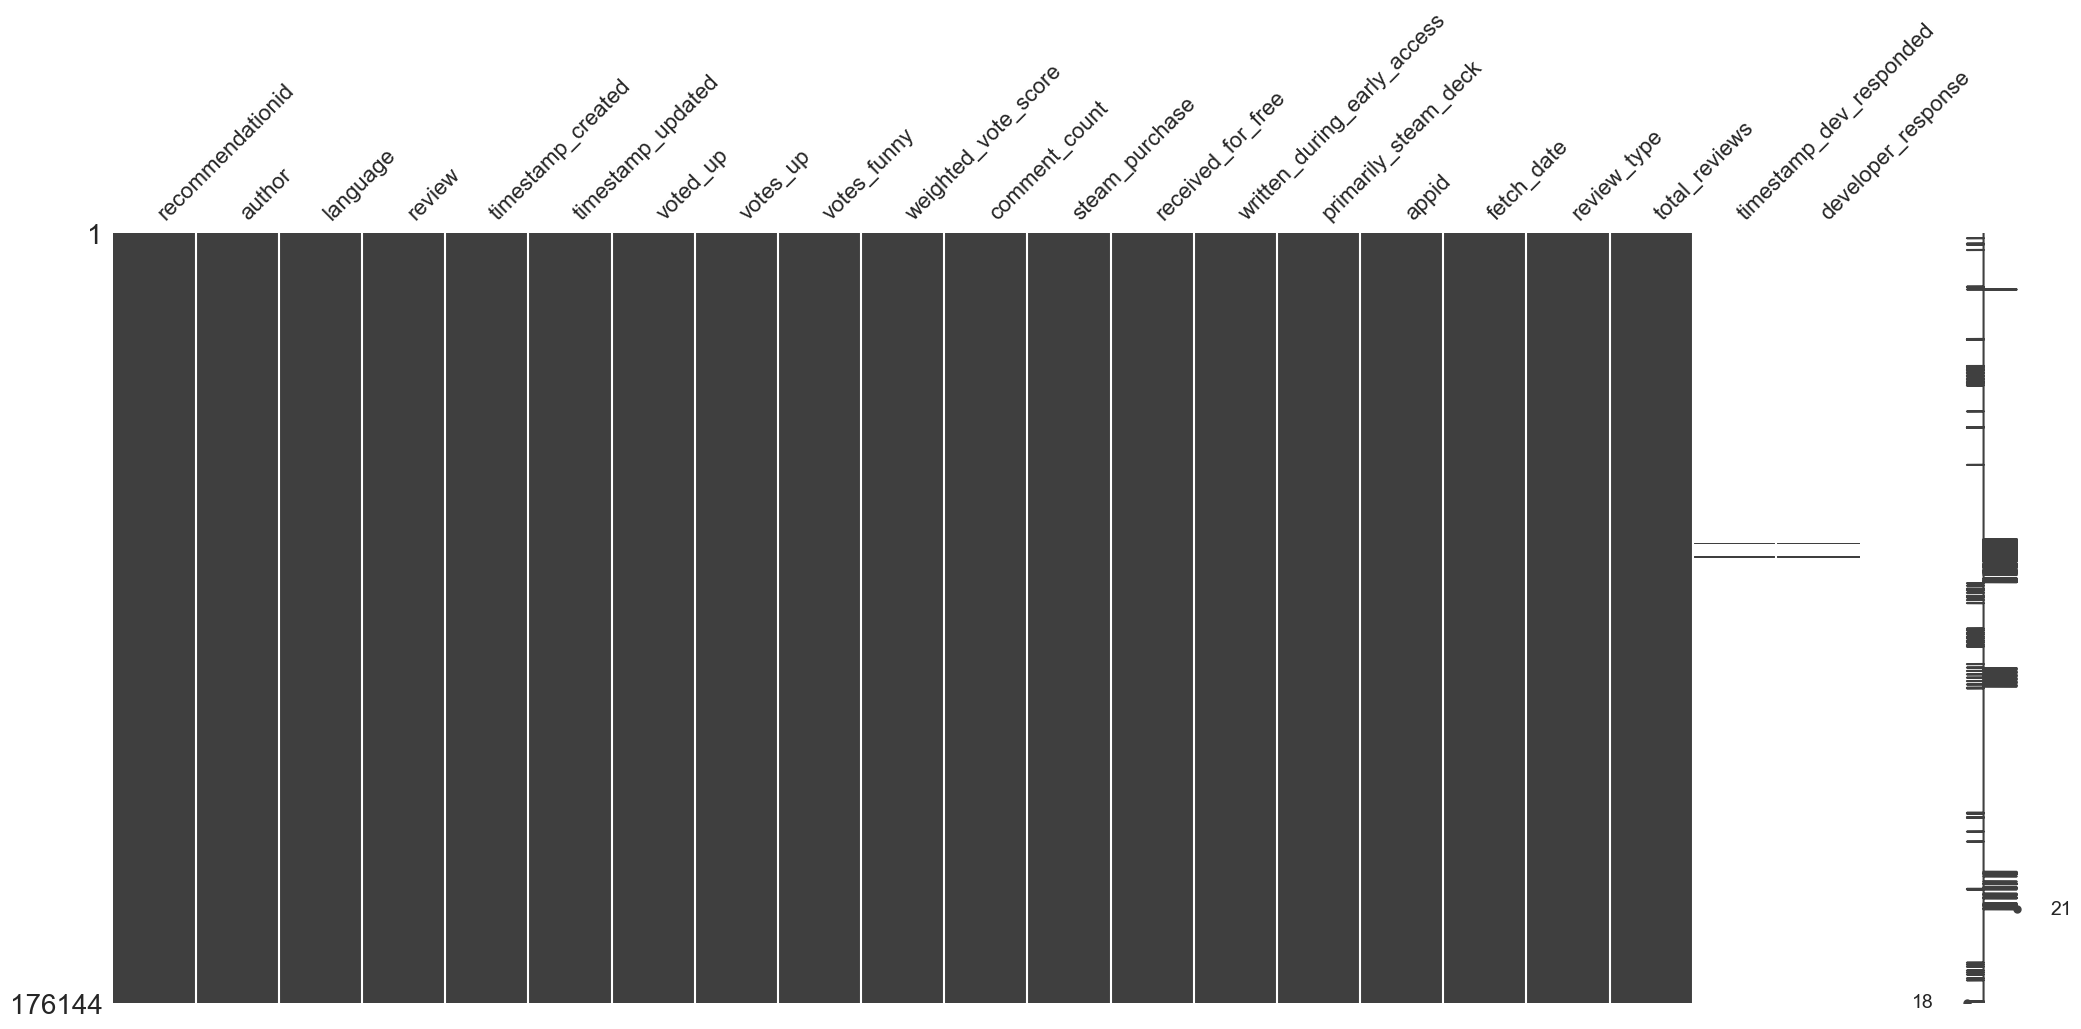

In [4]:
# Wizualizacja braków
msno.matrix(data)
plt.show()

Braki danych występują jedynie w kolumnach "author_deck_playtime_at_review, "timestamp_dev_responded" oraz "developer_response". Pierwsza dotyczy czasu gru autora recenzji na konsoli Steam Deck, pozostałe dwie dotyczą odpowiedzi dewelopera na recenzję. Warto zauważyć, że braki danych w tych kolumnach nie są problemem, ponieważ nie będą one istotne dla analizy sentymentalnej.

Korzystając z wiedzy eksperckiej możemy usunąć kolumny, które nie będą istotne dla analizy sentymentalnej. Są to kolumny: `recommendationid`, `timestamp_created`, `timestamp_updated`, `author_steamid`, `fetch_date`, `timestamp_dev_responded`, `developer_response`. Usuwamy je z naszego zbioru danych.

In [6]:
columns_to_remove = ['recommendationid', 'timestamp_created', 'timestamp_updated', 'fetch_date', 'timestamp_dev_responded', 'developer_response']
data_cleaned = data.drop(columns=columns_to_remove)
print(data_cleaned.info())
print(data_cleaned.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176144 entries, 0 to 176143
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   author                       176144 non-null  object 
 1   language                     176144 non-null  object 
 2   review                       175950 non-null  object 
 3   voted_up                     176144 non-null  bool   
 4   votes_up                     176144 non-null  int64  
 5   votes_funny                  176144 non-null  int64  
 6   weighted_vote_score          176144 non-null  float64
 7   comment_count                176144 non-null  int64  
 8   steam_purchase               176144 non-null  bool   
 9   received_for_free            176144 non-null  bool   
 10  written_during_early_access  176144 non-null  bool   
 11  primarily_steam_deck         176144 non-null  bool   
 12  appid                        176144 non-null  int64  
 13 